In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import interp1d

## 四张IGT原始收益分布定义

In [2]:
def discrete_gaussian_pmf(x, mean, std_dev):
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
    pmf = pdf / np.sum(pdf)
    return pmf

def cardA():
    # 分布1
    mean1 = 100
    std_dev1 = 25
    x_values1 = np.arange(mean1-100, mean1+101)
    pmf1 = discrete_gaussian_pmf(x_values1, mean1, std_dev1)
    pmf1 *= 0.5 / np.sum(pmf1)

    # 分布2
    mean2 = -150
    std_dev2 = 25
    x_values2 = np.arange(mean2-100, mean2+101)
    pmf2 = discrete_gaussian_pmf(x_values2, mean2, std_dev2)
    pmf2 *= 0.5 / np.sum(pmf2)

    # 合并两个分布的取值范围和取值
    x_values = np.concatenate([x_values1, x_values2])
    total_pmf = np.concatenate([pmf1, pmf2])

    return x_values, total_pmf

def cardB():
    # 生成分布1
    mean1 = -100
    std_dev1 = 25
    x_values1 = np.arange(mean1-100, mean1+101)
    pmf1 = discrete_gaussian_pmf(x_values1, mean1, std_dev1)
    pmf1 *= 0.9 / np.sum(pmf1)

    # 生成分布2
    mean2 = -1150
    std_dev2 = 25
    x_values2 = np.arange(mean2-100, mean2+101)
    pmf2 = discrete_gaussian_pmf(x_values2, mean2, std_dev2)
    pmf2 *= 0.1 / np.sum(pmf2)

    # 合并两个分布的取值范围和取值
    x_values = np.concatenate([x_values1, x_values2])
    total_pmf = np.concatenate([pmf1, pmf2])

    return x_values, total_pmf

def cardC():
    # 生成分布1
    mean1 = 50
    std_dev1 = 25
    x_values1 = np.arange(mean1-100, mean1+101)
    pmf1 = discrete_gaussian_pmf(x_values1, mean1, std_dev1)
    pmf1 *= 0.5 / np.sum(pmf1)

    # 生成分布2
    mean2 = 0
    std_dev2 = 25
    x_values2 = np.arange(mean2-100, mean2+101)
    pmf2 = discrete_gaussian_pmf(x_values2, mean2, std_dev2)
    pmf2 *= 0.5 / np.sum(pmf2)

    # 合并两个分布的取值范围和取值
    x_values = np.concatenate([x_values1, x_values2])
    total_pmf = np.concatenate([pmf1, pmf2])

    return x_values, total_pmf

def cardD():
    # 生成分布1
    mean1 = 50
    std_dev1 = 25
    x_values1 = np.arange(mean1-100, mean1+101)
    pmf1 = discrete_gaussian_pmf(x_values1, mean1, std_dev1)
    pmf1 *= 0.9 / np.sum(pmf1)

    # 生成分布2
    mean2 = -200
    std_dev2 = 25
    x_values2 = np.arange(mean2-100, mean2+101)
    pmf2 = discrete_gaussian_pmf(x_values2, mean2, std_dev2)
    pmf2 *= 0.1 / np.sum(pmf2)

    # 合并两个分布的取值范围和取值
    x_values = np.concatenate([x_values1, x_values2])
    total_pmf = np.concatenate([pmf1, pmf2])

    return x_values, total_pmf

# 1 修改期望—保持形状

In [3]:
# 修改期望值的函数
def modify_expectation(original_card_func, target_expectation):
    x_values, pmf = original_card_func()
    original_expectation = np.sum(x_values * pmf)
    delta = target_expectation - original_expectation
    new_x_values = x_values + delta
    
    def new_card_func():
        return new_x_values, pmf
    
    return new_card_func

# 根据新的要求生成函数
def generate_modified_functions(exp_A, exp_B, exp_C, exp_D):
    new_cardA = modify_expectation(cardA, exp_A)
    new_cardB = modify_expectation(cardB, exp_B)
    new_cardC = modify_expectation(cardC, exp_C)
    new_cardD = modify_expectation(cardD, exp_D)
    return new_cardA, new_cardB, new_cardC, new_cardD


### 设置十个难度等级

**（-25，25）为IGT原始期望**

In [28]:
ranges = [(-190, 190), (-180, 180), (-170, 170), (-160, 160), (-150, 150), (-140, 140), (-130, 130), (-120,120),(-110,110),(-100,100),(-90,90),(-80,80),(-70,70),(-60,60),(-50,50),(-40,40),(-30,30),(-20,20),(-10,10)]

# 初始化存储结果的字典
results = {}

# 在不同范围内调用 generate_modified_functions 函数
for i, (start, end) in enumerate(ranges, 1):
    new_cardA, new_cardB, new_cardC, new_cardD = generate_modified_functions(start, start, end, end)
    results[f'new_cardA{i}'] = new_cardA
    results[f'new_cardB{i}'] = new_cardB
    results[f'new_cardC{i}'] = new_cardC
    results[f'new_cardD{i}'] = new_cardD
    
for key, value in results.items():
    print(f"{key}: {value}")


new_cardA1: <function modify_expectation.<locals>.new_card_func at 0x7faf68a48e50>
new_cardB1: <function modify_expectation.<locals>.new_card_func at 0x7faf68a48b80>
new_cardC1: <function modify_expectation.<locals>.new_card_func at 0x7faf68a48f70>
new_cardD1: <function modify_expectation.<locals>.new_card_func at 0x7faf68a480d0>
new_cardA2: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd2d30>
new_cardB2: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd2dc0>
new_cardC2: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd20d0>
new_cardD2: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd2700>
new_cardA3: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd2790>
new_cardB3: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd2820>
new_cardC3: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd25e0>
new_cardD3: <function modify_expectation.<locals>.new_card_func at 0x7faf4acd28b0>
new_

In [30]:
x_values, pmf = results['new_cardA1']()
np.random.choice(x_values, p=pmf)

-317.0

### 期望检查

In [31]:
# 计算每个新函数的期望
def compute_expectation(card_func):
    x_values, pmf = card_func()
    return np.sum(x_values * pmf)

# 初始化存储期望的字典
expectations = {}

# 对results中的每个新函数计算期望
for key, value in results.items():
    expectations[key] = compute_expectation(value)

expectations


{'new_cardA1': -189.99999999999994,
 'new_cardB1': -189.99999999999997,
 'new_cardC1': 189.99999999999997,
 'new_cardD1': 189.99999999999994,
 'new_cardA2': -179.99999999999997,
 'new_cardB2': -180.0,
 'new_cardC2': 180.0,
 'new_cardD2': 179.99999999999997,
 'new_cardA3': -169.99999999999997,
 'new_cardB3': -170.0,
 'new_cardC3': 170.0,
 'new_cardD3': 169.99999999999997,
 'new_cardA4': -160.0,
 'new_cardB4': -159.99999999999997,
 'new_cardC4': 159.99999999999997,
 'new_cardD4': 160.0,
 'new_cardA5': -149.99999999999997,
 'new_cardB5': -150.0,
 'new_cardC5': 149.99999999999997,
 'new_cardD5': 150.0,
 'new_cardA6': -139.99999999999997,
 'new_cardB6': -139.99999999999997,
 'new_cardC6': 139.99999999999997,
 'new_cardD6': 139.99999999999997,
 'new_cardA7': -129.99999999999997,
 'new_cardB7': -129.99999999999997,
 'new_cardC7': 130.0,
 'new_cardD7': 130.0,
 'new_cardA8': -119.99999999999999,
 'new_cardB8': -120.0,
 'new_cardC8': 119.99999999999997,
 'new_cardD8': 119.99999999999999,
 'new_c

### 绘制示例

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


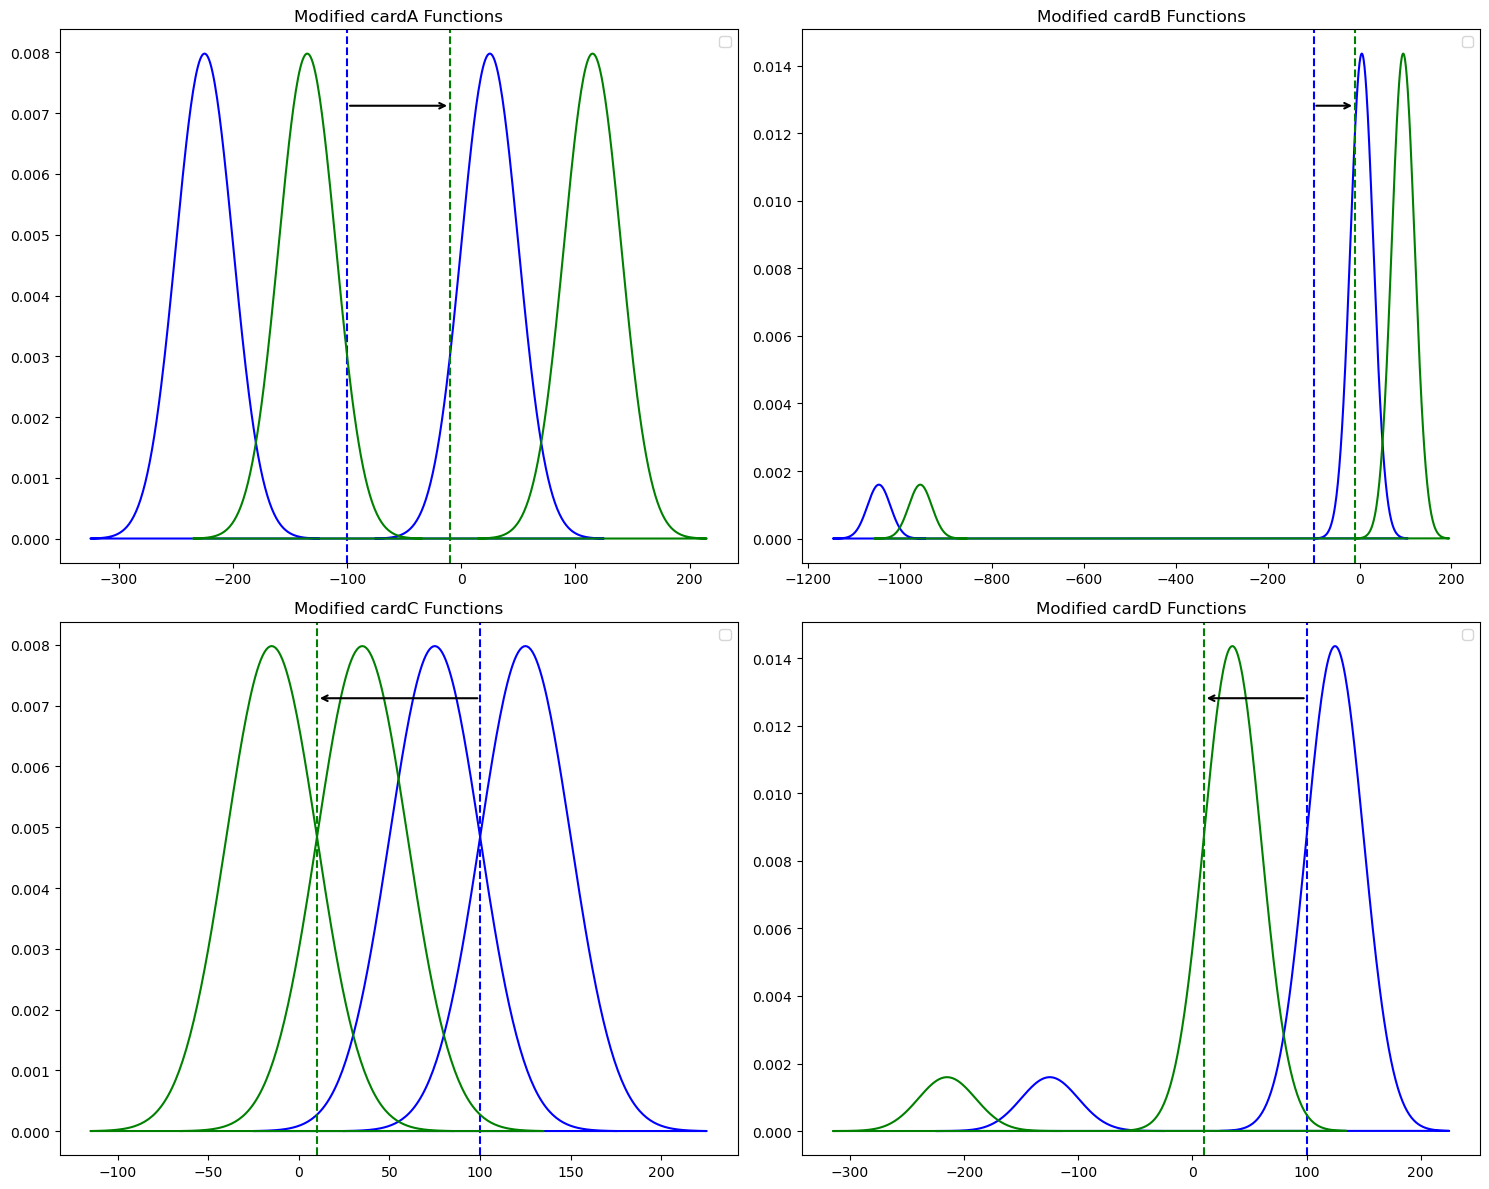

In [32]:
# Define the ranges
ranges = [(-100, 100), (-10, 10)]

# Generate the modified card functions for the updated ranges
results_updated = {}
for i, (start, end) in enumerate(ranges, 1):
    new_cardA, new_cardB, new_cardC, new_cardD = generate_modified_functions(start, start, end, end)
    results_updated[f'new_cardA{i}'] = new_cardA
    results_updated[f'new_cardB{i}'] = new_cardB
    results_updated[f'new_cardC{i}'] = new_cardC
    results_updated[f'new_cardD{i}'] = new_cardD

# Extract the modified card functions for each card
modified_cardA_functions_updated = [results_updated[f'new_cardA{i}'] for i in range(1, len(ranges)+1)]
modified_cardB_functions_updated = [results_updated[f'new_cardB{i}'] for i in range(1, len(ranges)+1)]
modified_cardC_functions_updated = [results_updated[f'new_cardC{i}'] for i in range(1, len(ranges)+1)]
modified_cardD_functions_updated = [results_updated[f'new_cardD{i}'] for i in range(1, len(ranges)+1)]

# Define colors and titles for the plots
colors_list_updated = [['blue', 'green'] for _ in range(4)]
titles = ['Modified cardA Functions', 'Modified cardB Functions', 'Modified cardC Functions', 'Modified cardD Functions']

# Plot functions as subplots
def plot_card_functions_as_subplots(card_functions_list, ranges, titles, colors_list):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    axs = axs.ravel()
    for i, (card_functions, title, colors) in enumerate(zip(card_functions_list, titles, colors_list)):
        ax = axs[i]
        means = []
        for card_function, (exp_good, exp_bad), color in zip(card_functions, ranges, colors):
            x_values, pmf = card_function()
            ax.plot(x_values, pmf,  color=color)
            current_mean = np.sum(x_values * pmf)
            means.append(current_mean)
            if np.isclose(current_mean, exp_good):
                ax.axvline(current_mean, color=color, linestyle='--')
            else:
                ax.axvline(current_mean, color=color, linestyle='--')
        arrow_x = np.mean(means)
        arrow_y = ax.get_ylim()[1] * 0.85
        ax.annotate('', xy=(means[1], arrow_y), xytext=(means[0], arrow_y),
                    arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5))
        ax.legend()
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Define ranges, colors, and titles
updated_ranges = [(-190, 190), (-10, 10)]
colors_list_updated = [['blue', 'green'] for _ in range(4)]
titles = ['Modified cardA Functions', 'Modified cardB Functions', 'Modified cardC Functions', 'Modified cardD Functions']

# Plot the functions for each card as subplots using the updated method
card_functions_list = [modified_cardA_functions_updated, modified_cardB_functions_updated, 
                       modified_cardC_functions_updated, modified_cardD_functions_updated]
plot_card_functions_as_subplots(card_functions_list, updated_ranges, titles, colors_list_updated)

# 2 保持期望—修改形状

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import interp1d

def discrete_gaussian_pmf(x, mean, std_dev):
    # 计算高斯概率密度函数（pdf）
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
    # 将pdf转换为离散概率质量函数（pmf）
    pmf = pdf / np.sum(pdf)
    return pmf

def calculate_expectation(x_values, pmf):
    # 计算期望值
    return np.sum(x_values * pmf)

def generate_random_bimodal_distribution(target_expectation, std_dev_range=(20, 50), weight_range=(0.4, 0.6)):
    # 随机选择两个高斯分布的参数（均值、标准差、权重）
    mean1 = np.random.uniform(-50, -25)
    mean2 = np.random.uniform(25, 50)
    std_dev1 = np.random.uniform(*std_dev_range)
    std_dev2 = np.random.uniform(*std_dev_range)
    weight = np.random.uniform(*weight_range)
    
    # 生成双峰分布
    x_values = np.linspace(-200, 200, 400)
    pmf = weight * norm.pdf(x_values, mean1, std_dev1) + (1 - weight) * norm.pdf(x_values, mean2, std_dev2)
    
    # 调整均值以匹配目标期望值
    expectation = calculate_expectation(x_values, pmf)
    mean_shift = target_expectation - expectation
    x_values += mean_shift
    
    # 标准化PMF
    pmf /= np.sum(pmf)
    
    return x_values, pmf

def generate_approaching_distributions(x_values_original, pmf_original, x_values_random, pmf_random, steps=100):
    distributions = []
    for i in range(1, steps+1):
        alpha = i / steps
        pmf_approaching = alpha * pmf_original + (1 - alpha) * pmf_random
        distributions.append((x_values_original, pmf_approaching))
    return distributions

def function_generator(original_function, plot=False):
    # 获取输入函数的原始分布
    x_values_original, pmf_original = original_function()

    # 计算输入函数的期望值
    target_expectation = calculate_expectation(x_values_original, pmf_original)

    # 生成一个与输入函数期望值相同的随机离散双峰分布
    x_values_random, pmf_random = generate_random_bimodal_distribution(target_expectation)

    # 调整随机双峰分布的x值以匹配原始分布的x值
    x_values_min = min(np.min(x_values_original), np.min(x_values_random))
    x_values_max = max(np.max(x_values_original), np.max(x_values_random))
    x_values_common = np.linspace(x_values_min, x_values_max, 400)

    # 将两个分布重新采样到公共的x值
    interp_func_original = interp1d(x_values_original, pmf_original, kind='linear', fill_value=0, bounds_error=False)
    pmf_original_resampled = interp_func_original(x_values_common)
    interp_func_random = interp1d(x_values_random, pmf_random, kind='linear', fill_value=0, bounds_error=False)
    pmf_random_resampled = interp_func_random(x_values_common)

    # 生成100个逐渐靠近原始分布的新分布
    distributions = generate_approaching_distributions(x_values_common, pmf_original_resampled, x_values_common, pmf_random_resampled, steps=100)

    # 创建一个字典存储生成的函数
    generated_functions = {}
    for i, (x_values, pmf) in enumerate(distributions):
        function_name = f'cardA{i+1}'
        generated_functions[function_name] = interp1d(x_values, pmf, kind='linear', fill_value=0, bounds_error=False)

    if plot:
        # Plot the random bimodal distribution and the approaching distributions
        plt.figure(figsize=[15, 8])
        plt.plot(x_values_common, pmf_random_resampled, label="Random Bimodal Distribution", color='red')

        # Plot the approaching distributions
        colors = plt.cm.Blues(np.linspace(0.5, 1, 5))  # Colors from light to dark
        for i, function_name in enumerate(generated_functions.keys()):
            if (i+1) % 20 == 0:  # Plot every 20th distribution
                plt.plot(x_values_common, generated_functions[function_name](x_values_common), label=function_name, color=colors[i//20])

        plt.legend()
        plt.title("Random Bimodal and Approaching Distributions")
        plt.xlabel("X Values")
        plt.ylabel("PMF")
        plt.show()

    return generated_functions


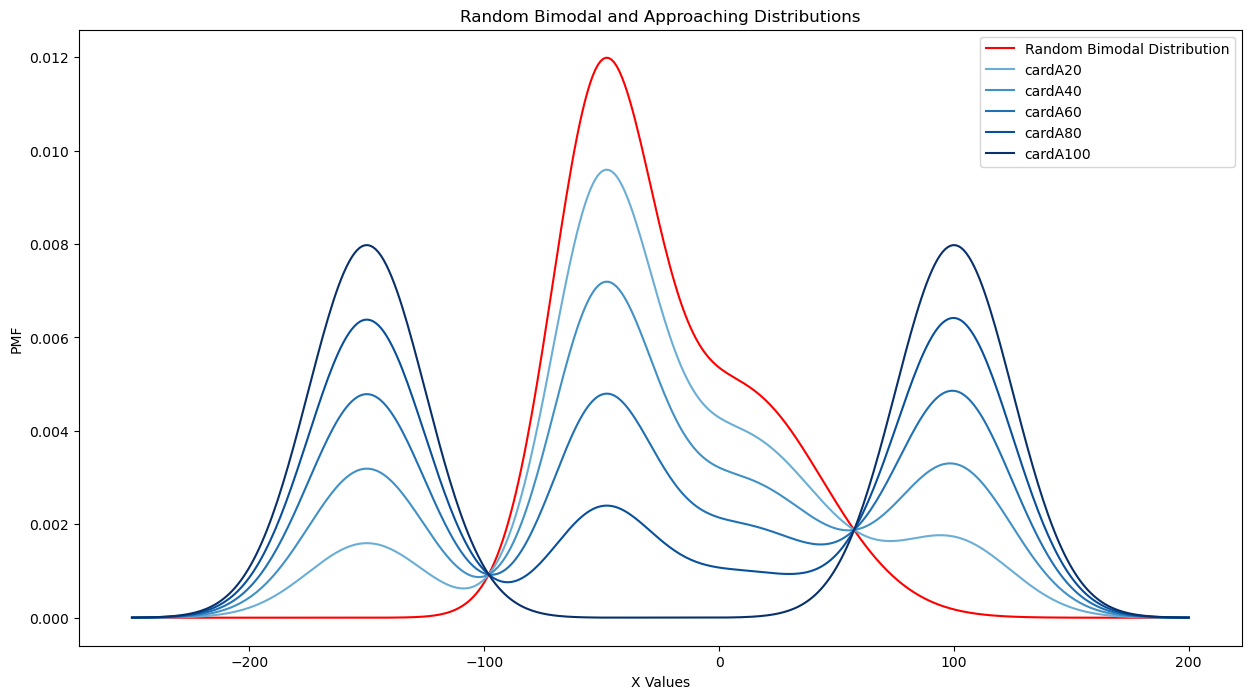

{'cardA1': <scipy.interpolate._interpolate.interp1d at 0x7faf4a82eea0>,
 'cardA2': <scipy.interpolate._interpolate.interp1d at 0x7faf4a82db80>,
 'cardA3': <scipy.interpolate._interpolate.interp1d at 0x7faf4a82dd10>,
 'cardA4': <scipy.interpolate._interpolate.interp1d at 0x7faf4a82dc70>,
 'cardA5': <scipy.interpolate._interpolate.interp1d at 0x7faf689054a0>,
 'cardA6': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840a40>,
 'cardA7': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840b80>,
 'cardA8': <scipy.interpolate._interpolate.interp1d at 0x7faf4a8402c0>,
 'cardA9': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840ae0>,
 'cardA10': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840900>,
 'cardA11': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840bd0>,
 'cardA12': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840090>,
 'cardA13': <scipy.interpolate._interpolate.interp1d at 0x7faf4a840630>,
 'cardA14': <scipy.interpolate._interpolate.interp1d at 0x7f

In [9]:
function_generator(cardA, plot=True)

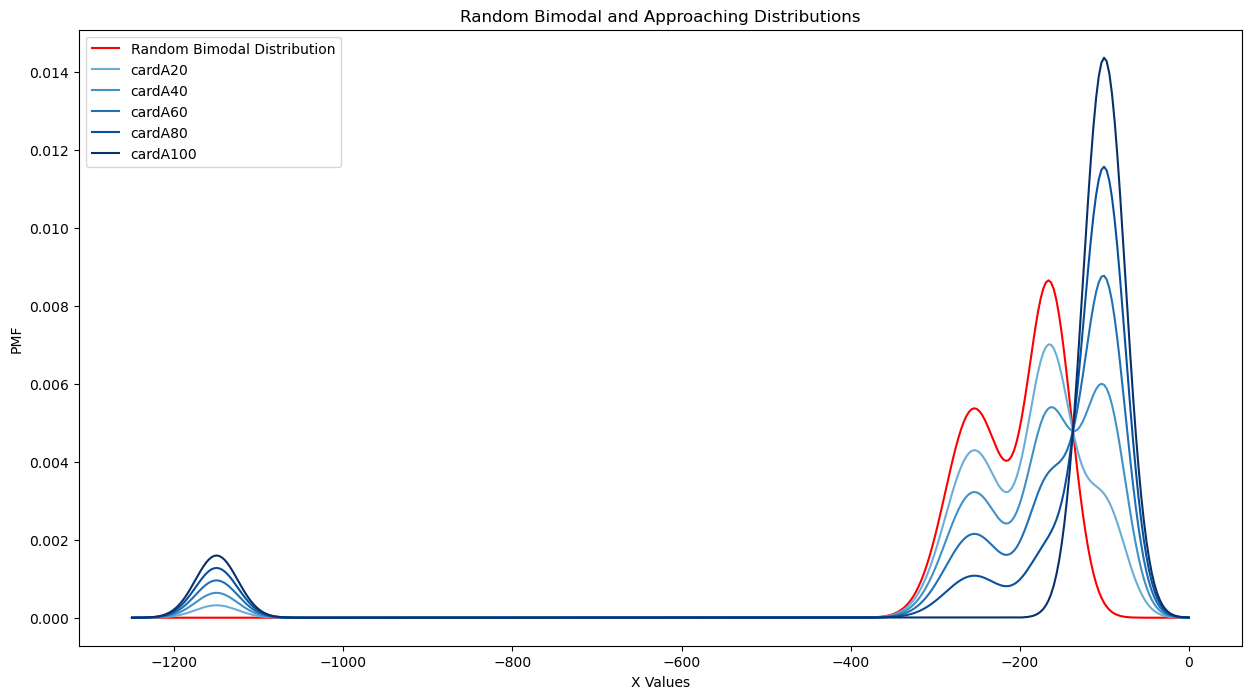

{'cardA1': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdcdb0>,
 'cardA2': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdcd10>,
 'cardA3': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdce50>,
 'cardA4': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdc9a0>,
 'cardA5': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdcef0>,
 'cardA6': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdcf40>,
 'cardA7': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdcf90>,
 'cardA8': <scipy.interpolate._interpolate.interp1d at 0x7faf69495f90>,
 'cardA9': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdf040>,
 'cardA10': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdf090>,
 'cardA11': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdf0e0>,
 'cardA12': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdf130>,
 'cardA13': <scipy.interpolate._interpolate.interp1d at 0x7faf58cdf180>,
 'cardA14': <scipy.interpolate._interpolate.interp1d at 0x7f

In [10]:
function_generator(cardB, plot=True)

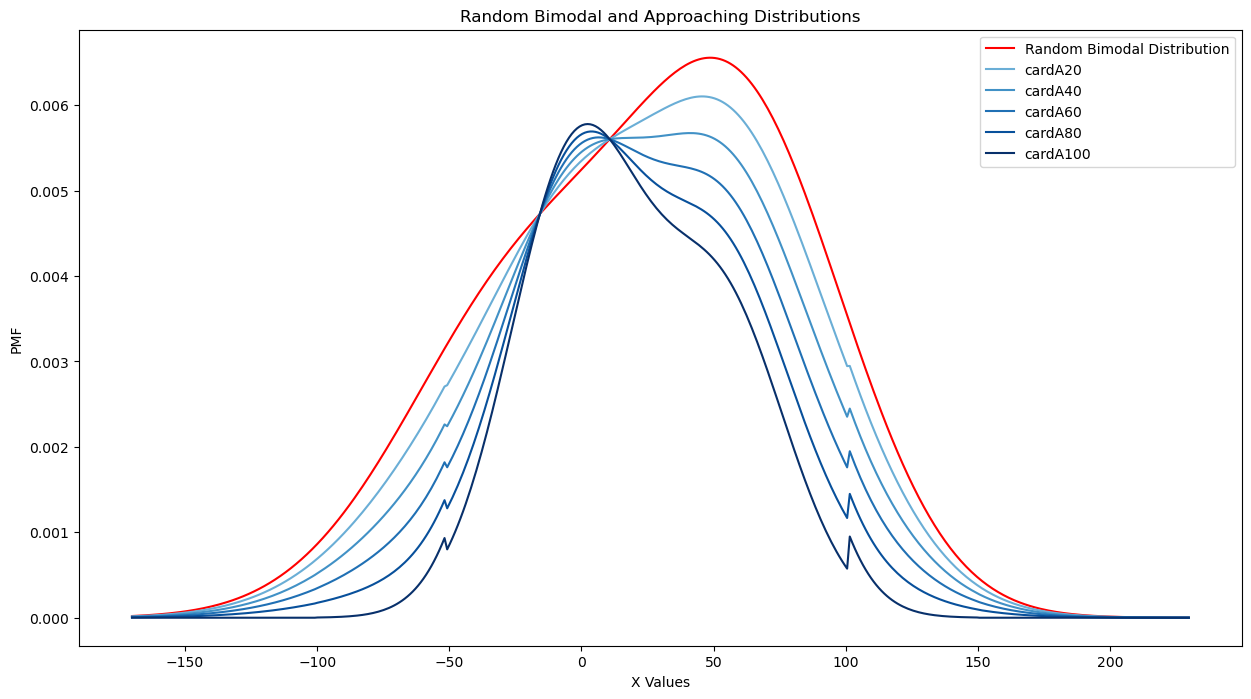

{'cardA1': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc040>,
 'cardA2': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc090>,
 'cardA3': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc180>,
 'cardA4': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc6d0>,
 'cardA5': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc130>,
 'cardA6': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc310>,
 'cardA7': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc2c0>,
 'cardA8': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc810>,
 'cardA9': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc860>,
 'cardA10': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc8b0>,
 'cardA11': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc900>,
 'cardA12': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc950>,
 'cardA13': <scipy.interpolate._interpolate.interp1d at 0x7faf4acfc9a0>,
 'cardA14': <scipy.interpolate._interpolate.interp1d at 0x7f

In [11]:
function_generator(cardC, plot=True)

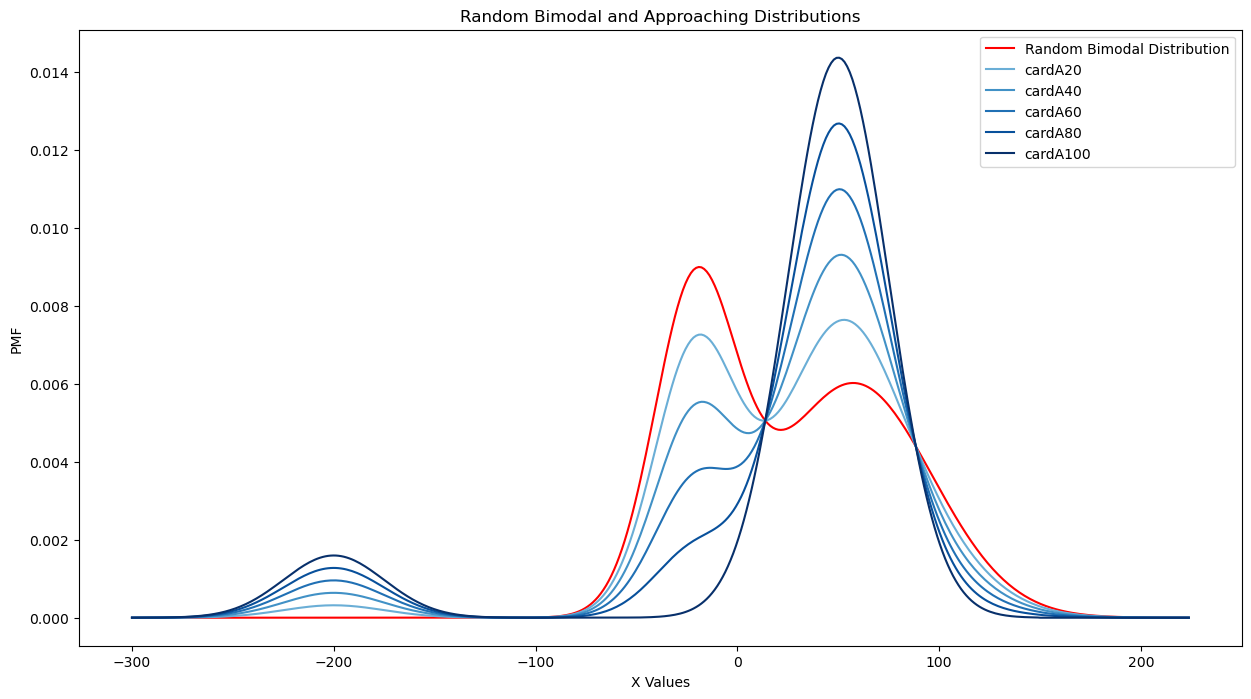

{'cardA1': <scipy.interpolate._interpolate.interp1d at 0x7faf78761db0>,
 'cardA2': <scipy.interpolate._interpolate.interp1d at 0x7faf78769270>,
 'cardA3': <scipy.interpolate._interpolate.interp1d at 0x7faf78769b80>,
 'cardA4': <scipy.interpolate._interpolate.interp1d at 0x7faf7876bea0>,
 'cardA5': <scipy.interpolate._interpolate.interp1d at 0x7faf787555e0>,
 'cardA6': <scipy.interpolate._interpolate.interp1d at 0x7faf78755680>,
 'cardA7': <scipy.interpolate._interpolate.interp1d at 0x7faf4acf8f90>,
 'cardA8': <scipy.interpolate._interpolate.interp1d at 0x7faf4ac95360>,
 'cardA9': <scipy.interpolate._interpolate.interp1d at 0x7faf4ac95180>,
 'cardA10': <scipy.interpolate._interpolate.interp1d at 0x7faf4ac959a0>,
 'cardA11': <scipy.interpolate._interpolate.interp1d at 0x7faf4ac953b0>,
 'cardA12': <scipy.interpolate._interpolate.interp1d at 0x7faf4ac95310>,
 'cardA13': <scipy.interpolate._interpolate.interp1d at 0x7faf4ac951d0>,
 'cardA14': <scipy.interpolate._interpolate.interp1d at 0x7f

In [12]:
function_generator(cardD, plot=True)